### Importing

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/usa_houses.csv')

### Preprocessing

#### Selecting columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [4]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
columns = ['price', 'bed', 'bath', 'house_size', 'zip_code', 'city', 'state']
df = df[columns]

In [6]:
df

,price,bed,bath,house_size,zip_code,city,state
0,105000.0,3.0,2.0,920.0,601.0,Adjuntas,Puerto Rico
1,80000.0,4.0,2.0,1527.0,601.0,Adjuntas,Puerto Rico
2,67000.0,2.0,1.0,748.0,795.0,Juana Diaz,Puerto Rico
3,145000.0,4.0,2.0,1800.0,731.0,Ponce,Puerto Rico
4,65000.0,6.0,2.0,NaN,680.0,Mayaguez,Puerto Rico
...,...,...,...,...,...,...,...
2226377,359900.0,4.0,2.0,3600.0,99354.0,Richland,Washington
2226378,350000.0,3.0,2.0,1616.0,99354.0,Richland,Washington
2226379,440000.0,6.0,3.0,3200.0,99354.0,Richland,Washington
2226380,179900.0,2.0,1.0,933.0,99354.0,Richland,Washington


#### Dealing with null values

In [7]:
display(df.isna().sum())
display(df.shape)

price           1541
bed           481317
bath          511771
house_size    568484
zip_code         299
city            1407
state              8
dtype: int64

(2226382, 7)

In [8]:
df = df.dropna()

In [9]:
display(df.isna().sum())
display(df.shape)

price         0
bed           0
bath          0
house_size    0
zip_code      0
city          0
state         0
dtype: int64

(1605094, 7)

#### Dealing with duplicated values

In [10]:
display(df.duplicated().sum())
display(df.shape)

131765

(1605094, 7)

In [11]:
df = df.drop_duplicates()

In [12]:
display(df.duplicated().sum())
display(df.shape)

0

(1473329, 7)

#### Changing datatypes from float to int

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473329 entries, 0 to 2226381
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   price       1473329 non-null  float64
 1   bed         1473329 non-null  float64
 2   bath        1473329 non-null  float64
 3   house_size  1473329 non-null  float64
 4   zip_code    1473329 non-null  float64
 5   city        1473329 non-null  object 
 6   state       1473329 non-null  object 
dtypes: float64(5), object(2)
memory usage: 89.9+ MB


In [14]:
df['zip_code'] = df['zip_code'].astype('int')
df['bed'] = df['bed'].astype('int')
df['bath'] = df['bath'].astype('int')

#### Selecting the State with more data (California)

In [15]:
df['state'].value_counts()

state
California              172774
Florida                 165024
Texas                   142985
New York                 65627
Illinois                 57343
Pennsylvania             54222
Virginia                 50074
Arizona                  49325
Georgia                  48944
Washington               46401
Ohio                     42829
North Carolina           39640
Maryland                 36569
Massachusetts            34951
Minnesota                31067
Missouri                 30698
Oklahoma                 26608
Oregon                   25391
Michigan                 24313
New Jersey               22683
Colorado                 22632
South Carolina           20899
Alabama                  19164
Wisconsin                18860
Tennessee                18520
Iowa                     17130
Kentucky                 16148
Louisiana                16117
Indiana                  12526
Connecticut              11712
Arkansas                 11616
New Mexico               11462
Ka

In [16]:
df = df[df.state=='California']

#### Bedrooms

In [17]:
df['bed'].describe().apply(lambda x: format(x, 'f'))

count    172774.000000
mean          3.271459
std           1.752502
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         108.000000
Name: bed, dtype: object

In [18]:
def remove_outliers(df):
    q1 = df.bed.quantile(0.25)
    q3 = df.bed.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return df[(df.bed > lower_limit) & (df.bed < upper_limit)]    

In [19]:
df.shape

(172774, 7)

In [20]:
df = remove_outliers(df)

In [21]:
df.shape

(170087, 7)

In [22]:
df['bed'].describe().apply(lambda x: format(x, 'f'))

count    170087.000000
mean          3.147489
std           1.019466
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: bed, dtype: object

In [23]:
df = df[df.bed <5]

<Axes: xlabel='bed', ylabel='price'>

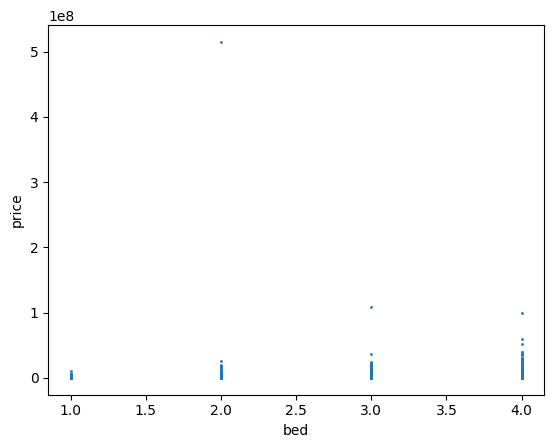

In [24]:
df.plot.scatter(
    x="bed",
    y="price",
    s=1,
)

In [25]:
df['bed'].describe().apply(lambda x: format(x, 'f'))

count    154988.000000
mean          2.948448
std           0.824163
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: bed, dtype: object

In [26]:
df.groupby('bed')['price'].mean().apply(lambda x: format(x, 'f'))

bed
1     518941.103495
2     666187.085299
3     846002.443056
4    1209097.170956
Name: price, dtype: object

In [27]:
df.groupby('bed')['price'].count()

bed
1     6609
2    37011
3    69129
4    42239
Name: price, dtype: int64

#### Bathrooms

In [28]:
df['bath'].describe().apply(lambda x: format(x, 'f'))

count    154988.000000
mean          2.302275
std           0.861145
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          38.000000
Name: bath, dtype: object

In [29]:
def remove_outliers(df):
    q1 = df.bath.quantile(0.25)
    q3 = df.bath.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return df[(df.bath > lower_limit) & (df.bath < upper_limit)]    

In [30]:
df.shape

(154988, 7)

In [31]:
df = remove_outliers(df)

In [32]:
df.shape

(152724, 7)

In [33]:
df['bath'].describe().apply(lambda x: format(x, 'f'))

count    152724.000000
mean          2.257144
std           0.766463
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: bath, dtype: object

<Axes: xlabel='bath', ylabel='price'>

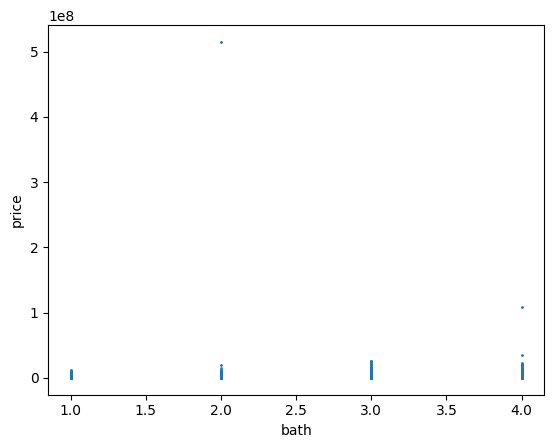

In [34]:
df.plot.scatter(
    x="bath",
    y="price",
    s=1,
)

In [35]:
df.groupby('bath')['price'].mean().apply(lambda x: format(x, 'f'))

bath
1     552701.790712
2     714026.368758
3    1030414.075449
4    1796419.365093
Name: price, dtype: object

In [36]:
df.groupby('bath')['price'].count()

bath
1    22223
2    77056
3    45395
4     8050
Name: price, dtype: int64

#### House size

In [37]:
df['house_size'].describe().apply(lambda x: format(x, 'f'))

count    152724.000000
mean       1639.865070
std         755.188331
min         100.000000
25%        1178.000000
50%        1519.000000
75%        1968.000000
max      108000.000000
Name: house_size, dtype: object

In [38]:
def remove_outliers(df):
    q1 = df.house_size.quantile(0.25)
    q3 = df.house_size.quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return df[(df.house_size > lower_limit) & (df.house_size < upper_limit)]    

In [39]:
df.shape

(152724, 7)

In [40]:
df = remove_outliers(df)

In [41]:
df.shape

(148350, 7)

In [42]:
df['house_size'].describe().apply(lambda x: format(x, 'f'))

count    148350.000000
mean       1577.220681
std         549.800937
min         100.000000
25%        1168.000000
50%        1500.000000
75%        1915.000000
max        3152.000000
Name: house_size, dtype: object

In [43]:
df = df[(df.house_size>=500) & (df.house_size<=3000)]

<Axes: xlabel='house_size', ylabel='price'>

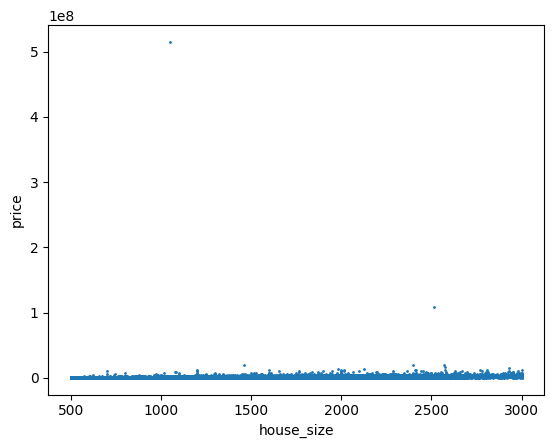

In [44]:
df.plot.scatter(
    x="house_size",
    y="price",
    s=1,
)

In [45]:
df['house_size'].describe().apply(lambda x: format(x, 'f'))

count    146374.000000
mean       1566.221761
std         528.343368
min         500.000000
25%        1168.000000
50%        1496.000000
75%        1901.000000
max        3000.000000
Name: house_size, dtype: object

In [46]:
df.groupby('bed')['price'].mean().apply(lambda x: format(x, 'f'))

bed
1    531932.644647
2    658123.161569
3    807610.638952
4    966428.727590
Name: price, dtype: object

In [47]:
df.groupby('bath')['price'].mean().apply(lambda x: format(x, 'f'))

bath
1     557733.222560
2     712324.454603
3     992569.478845
4    1469024.517586
Name: price, dtype: object

#### Price

In [48]:
df.price.describe().apply(lambda x: format(x, 'f'))

count       146374.000000
mean        797213.332744
std        1499233.514472
min              1.000000
25%         455000.000000
50%         649999.000000
75%         925000.000000
max      515000000.000000
Name: price, dtype: object

In [49]:
df = df[df.price>50000]

In [50]:
df = df[df.price<2000000]

In [51]:
df.price.describe().apply(lambda x: format(x, 'f'))

count     141047.000000
mean      718374.078903
std       381386.793929
min        51999.000000
25%       450000.000000
50%       639900.000000
75%       895000.000000
max      1999999.000000
Name: price, dtype: object

In [52]:
df.shape

(141047, 7)

In [53]:
df.groupby('bed')['price'].mean().apply(lambda x: format(x, 'f'))

bed
1    524467.930394
2    604054.891837
3    730217.026796
4    851916.553853
Name: price, dtype: object

In [54]:
df.groupby('bath')['price'].mean().apply(lambda x: format(x, 'f'))

bath
1     545438.897293
2     665858.403030
3     871663.913254
4    1077887.391156
Name: price, dtype: object

#### Bedrooms and Bathrooms outliers

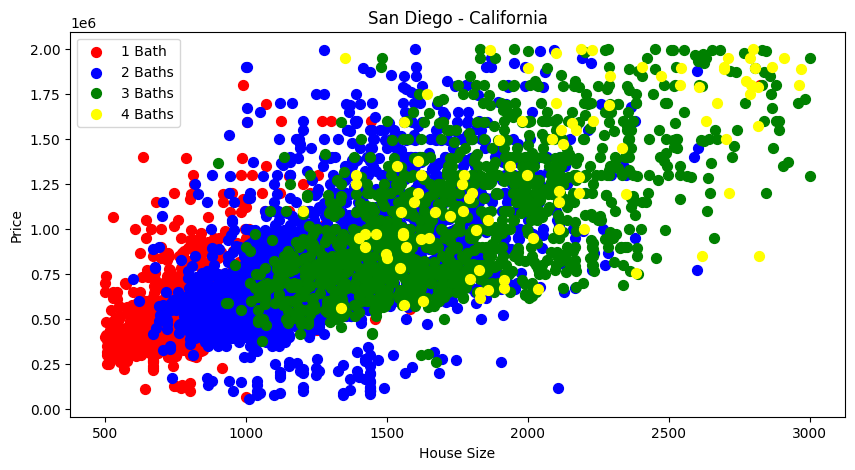

In [55]:
import matplotlib
def plot_scatter_bath(df, city):
    bath1 = df[(df.city == city) & (df.bath == 1)]
    bath2 = df[(df.city == city) & (df.bath == 2)]
    bath3 = df[(df.city == city) & (df.bath == 3)]
    bath4 = df[(df.city == city) & (df.bath == 4)]
    matplotlib.rcParams["figure.figsize"] = (10, 5)
    plt.scatter(bath1.house_size, bath1.price, color="red", label="1 Bath", s=50)
    plt.scatter(bath2.house_size, bath2.price, color="blue", label="2 Baths", s=50)
    plt.scatter(bath3.house_size, bath3.price, color="green", label="3 Baths", s=50)
    plt.scatter(bath4.house_size, bath4.price, color="yellow", label="4 Baths", s=50)
    plt.xlabel("House Size")
    plt.ylabel("Price")
    plt.title(f"{city} - California")
    plt.legend()


plot_scatter_bath(df, "San Diego")

In [56]:
def rmv_bath_outliers(df):
    exclude_indices = np.array([])
    for city, loc_df in df.groupby('city'):
        bath_stats = {}
        for bath, bath_df in loc_df.groupby('bath'):
            bath_stats[bath] = {
                'mean': np.mean(bath_df.price),
                'std': np.std(bath_df.price),
                'count': bath_df.shape[0]
            }
        for bath, bath_df in loc_df.groupby('bath'):
            stats = bath_stats.get(bath-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bath_df[ (bath_df.price<1.3*(stats['mean']-stats['std'])) | (bath_df.price>1.3*(stats['mean']+stats['std'])) ].index.values)
    return df.drop(exclude_indices,axis='index')
    
display(f'Old shape: {df.shape}')
df = rmv_bath_outliers(df)
display(f'New shape: {df.shape}')

'Old shape: (141047, 7)'

'New shape: (109910, 7)'

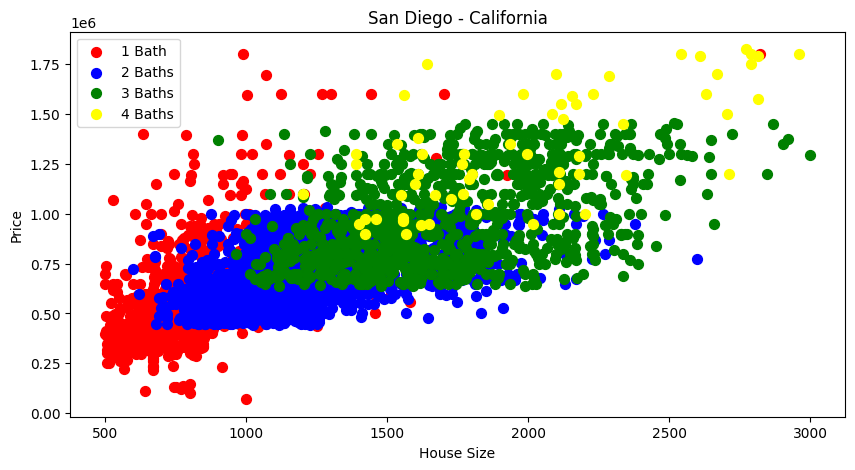

In [57]:
plot_scatter_bath(df, "San Diego")

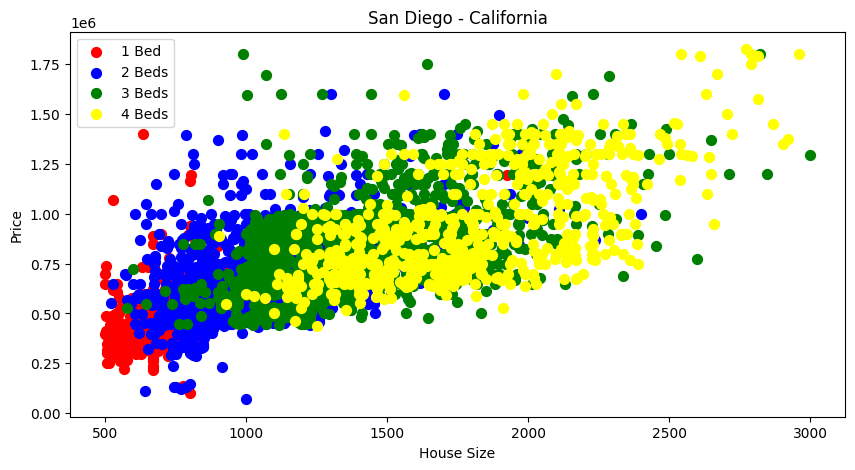

In [58]:
def plot_scatter_bed(df, city):
    bed1 = df[(df.city == city) & (df.bed == 1)]
    bed2 = df[(df.city == city) & (df.bed == 2)]
    bed3 = df[(df.city == city) & (df.bed == 3)]
    bed4 = df[(df.city == city) & (df.bed == 4)]
    matplotlib.rcParams["figure.figsize"] = (10, 5)
    plt.scatter(bed1.house_size, bed1.price, color="red", label="1 Bed", s=50)
    plt.scatter(bed2.house_size, bed2.price, color="blue", label="2 Beds", s=50)
    plt.scatter(bed3.house_size, bed3.price, color="green", label="3 Beds", s=50)
    plt.scatter(bed4.house_size, bed4.price, color="yellow", label="4 Beds", s=50)
    plt.xlabel("House Size")
    plt.ylabel("Price")
    plt.title(f"{city} - California")
    plt.legend()


plot_scatter_bed(df, "San Diego")

In [59]:
def rmv_bed_outliers(df):
    exclude_indices = np.array([])
    for city, loc_df in df.groupby('city'):
        bed_stats = {}
        for bed, bed_df in loc_df.groupby('bed'):
            bed_stats[bed] = {
                'mean': np.mean(bed_df.price),
                'std': np.std(bed_df.price),
                'count': bed_df.shape[0]
            }
        for bed, bed_df in loc_df.groupby('bed'):
            stats = bed_stats.get(bed-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bed_df[ (bed_df.price<1.3*(stats['mean']-stats['std'])) | (bed_df.price>1.3*(stats['mean']+stats['std'])) ].index.values)
    return df.drop(exclude_indices,axis='index')
    
display(f'Old shape: {df.shape}')
df = rmv_bed_outliers(df)
display(f'New shape: {df.shape}')

'Old shape: (109910, 7)'

'New shape: (83993, 7)'

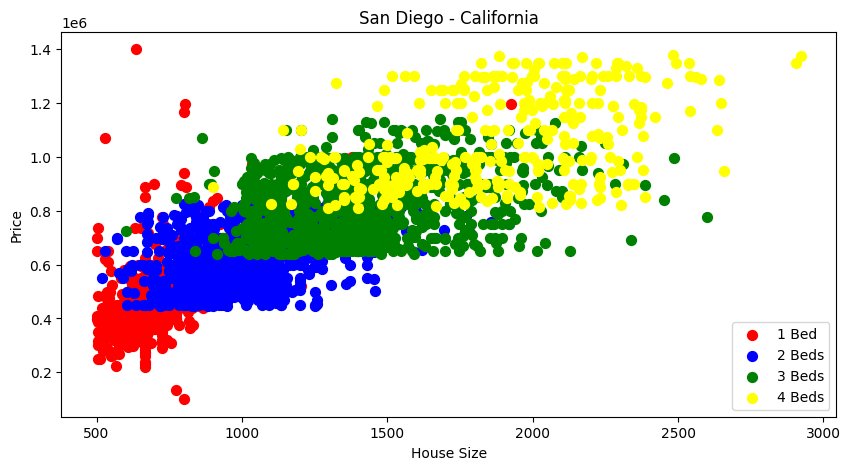

In [60]:
plot_scatter_bed(df, "San Diego")

In [61]:
df.groupby('bed')['price'].mean().apply(lambda x: format(x, 'f'))

bed
1    519325.640593
2    576078.930625
3    678186.828134
4    861265.897102
Name: price, dtype: object

In [62]:
df.groupby('bath')['price'].mean().apply(lambda x: format(x, 'f'))

bath
1     530375.659731
2     633481.575740
3     837818.817667
4    1103798.995700
Name: price, dtype: object

In [63]:
df.shape

(83993, 7)

### Taking a sample of the dataset

In [65]:
df2 = df.groupby('city').filter(lambda x: len(x) > 500)

In [66]:
df2.city.unique()

array(['Los Angeles', 'Long Beach', 'San Bernardino', 'Fontana',
       'Chula Vista', 'San Diego', 'Escondido', 'Oceanside', 'Menifee',
       'Moreno Valley', 'Riverside', 'Bakersfield', 'Fresno', 'San Jose',
       'Oakland', 'San Francisco', 'Stockton', 'Modesto', 'Sacramento',
       'Elk Grove', 'Roseville'], dtype=object)

In [72]:
df2.shape

(24294, 7)

In [71]:
df2.groupby('city')['city'].count()

city
Bakersfield        674
Chula Vista        631
Elk Grove          535
Escondido          524
Fontana            638
Fresno             535
Long Beach         981
Los Angeles       2675
Menifee            575
Modesto           1019
Moreno Valley      630
Oakland           1098
Oceanside          883
Riverside          733
Roseville          536
Sacramento        3245
San Bernardino     598
San Diego         3140
San Francisco     1624
San Jose          2011
Stockton          1009
Name: city, dtype: int64

In [75]:
df3 = df2.groupby('city').sample(frac=1).groupby('city').head(500)

<Axes: xlabel='house_size', ylabel='price'>

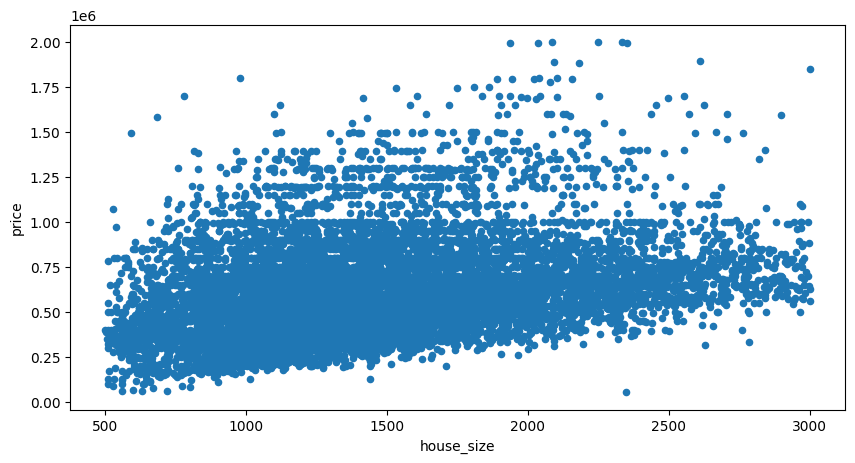

In [77]:
df3.plot.scatter(x='house_size', y='price')

<Axes: xlabel='bath', ylabel='price'>

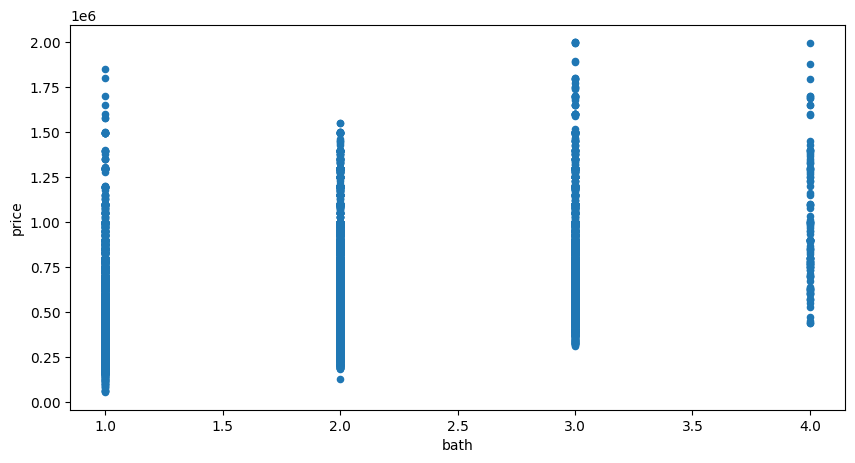

In [78]:
df3.plot.scatter(x='bath', y='price')

<Axes: xlabel='bed', ylabel='price'>

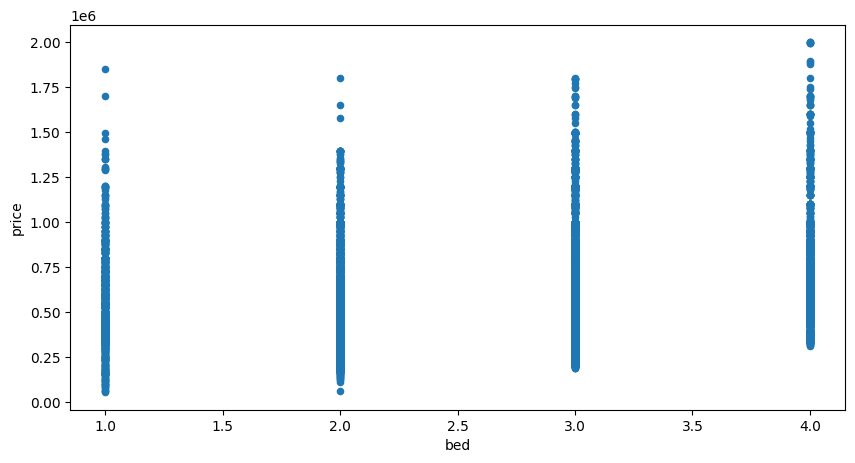

In [79]:
df3.plot.scatter(x='bed', y='price')

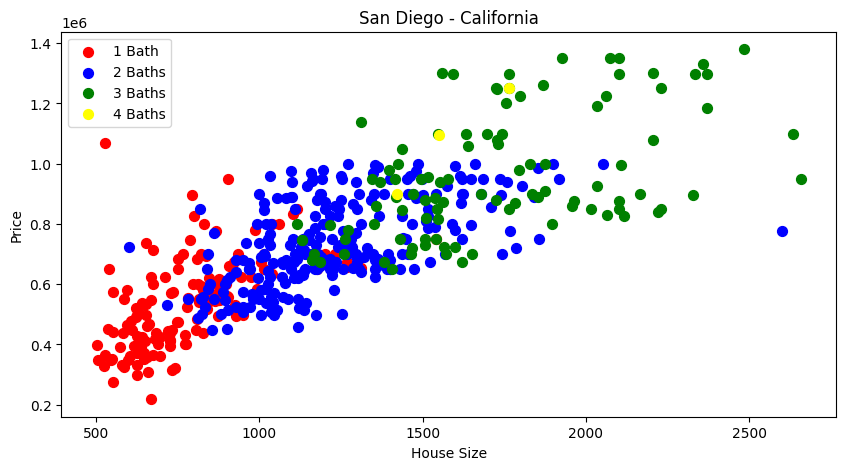

In [80]:
plot_scatter_bath(df3, "San Diego")

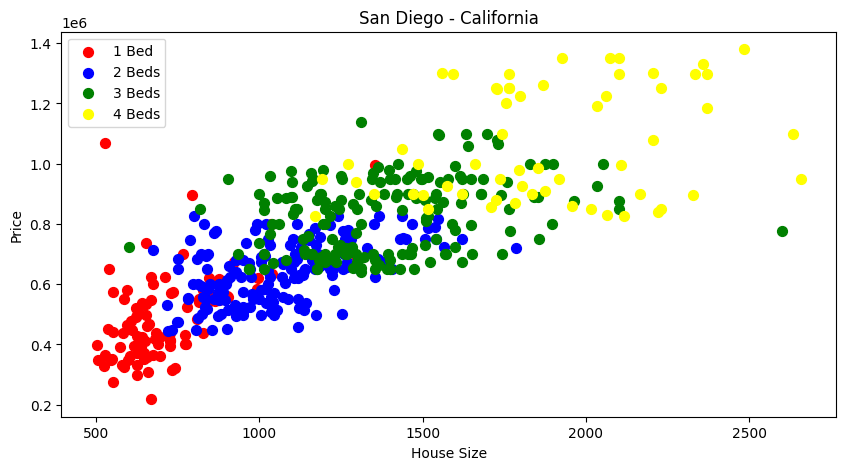

In [81]:
plot_scatter_bed(df3, "San Diego")

### Saving the dataset

In [82]:
df3.to_csv('../dataset/usa_houses_clean.csv', index=False)